# 1

Regularization. Using the accompanying Hitters dataset, we will explore regression models to predict a player’s Salary from other variables. You must python.

https://gist.github.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
Hitters=pd.read_csv("Hitters.csv",index_col=0)
Hitters=Hitters.drop(columns=['League','Division','NewLeague'])
Hitters=Hitters.dropna()

In [16]:
Hitters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, -Alan Ashby to -Willie Wilson
Data columns (total 17 columns):
AtBat      263 non-null int64
Hits       263 non-null int64
HmRun      263 non-null int64
Runs       263 non-null int64
RBI        263 non-null int64
Walks      263 non-null int64
Years      263 non-null int64
CAtBat     263 non-null int64
CHits      263 non-null int64
CHmRun     263 non-null int64
CRuns      263 non-null int64
CRBI       263 non-null int64
CWalks     263 non-null int64
PutOuts    263 non-null int64
Assists    263 non-null int64
Errors     263 non-null int64
Salary     263 non-null float64
dtypes: float64(1), int64(16)
memory usage: 37.0+ KB


In [17]:
Hitters

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.000
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.000
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.000
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.500
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.000
-Al Newman,185,37,1,23,8,21,2,214,42,1,30,9,24,76,127,7,70.000
-Argenis Salazar,298,73,0,24,24,7,3,509,108,0,41,37,12,121,283,9,100.000
-Andres Thomas,323,81,6,26,32,8,2,341,86,6,32,34,8,143,290,19,75.000
-Andre Thornton,401,92,17,49,66,65,13,5206,1332,253,784,890,866,0,0,0,1100.000
-Alan Trammell,574,159,21,107,75,59,10,4631,1300,90,702,504,488,238,445,22,517.143


In [18]:
y=Hitters['Salary']
x=Hitters.drop(['Salary'],axis=1)#axis=1 means drop the column

In [19]:
y

-Alan Ashby           475.000
-Alvin Davis          480.000
-Andre Dawson         500.000
-Andres Galarraga      91.500
-Alfredo Griffin      750.000
-Al Newman             70.000
-Argenis Salazar      100.000
-Andres Thomas         75.000
-Andre Thornton      1100.000
-Alan Trammell        517.143
-Alex Trevino         512.500
-Andy VanSlyke        550.000
-Alan Wiggins         700.000
-Bill Almon           240.000
-Buddy Bell           775.000
-Buddy Biancalana     175.000
-Bruce Bochy          135.000
-Barry Bonds          100.000
-Bobby Bonilla        115.000
-Bob Brenly           600.000
-Bill Buckner         776.667
-Brett Butler         765.000
-Bob Dernier          708.333
-Bo Diaz              750.000
-Bill Doran           625.000
-Brian Downing        900.000
-Billy Hatcher        110.000
-Brook Jacoby         612.500
-Bob Kearney          300.000
-Bill Madlock         850.000
                       ...   
-Tony Fernandez       350.000
-Tim Flannery         326.667
-Tom Foley

In [20]:
x

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25
-Al Newman,185,37,1,23,8,21,2,214,42,1,30,9,24,76,127,7
-Argenis Salazar,298,73,0,24,24,7,3,509,108,0,41,37,12,121,283,9
-Andres Thomas,323,81,6,26,32,8,2,341,86,6,32,34,8,143,290,19
-Andre Thornton,401,92,17,49,66,65,13,5206,1332,253,784,890,866,0,0,0
-Alan Trammell,574,159,21,107,75,59,10,4631,1300,90,702,504,488,238,445,22


# 1.1

Use LASSO regression to predict Salary from the other numeric predictors. Create a visualization of the coefficient trajectories. Comment on which are the final three predictors that remain in the model. Use cross-validation to find the optimal value of the regularization penality. How many predictors are left in that model?

In [21]:
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso

In [22]:
alphas=10**np.linspace(-2,10,100)

In [23]:
coef=[]
for i in alphas:
    lasso=Lasso(alpha=i, max_iter=10000,normalize=True)
    lasso.fit(x,y)
    coef.append(lasso.coef_)

Text(0.5, 1.0, 'The Coefficients Trajectory')

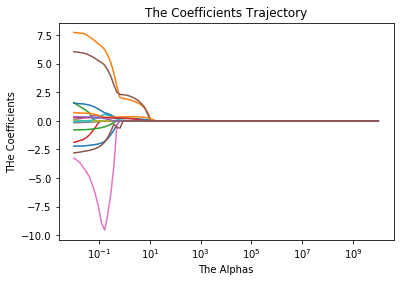

In [27]:
fig = plt.gca()
fig.plot(alphas, coef)
fig.set_xscale('log')
plt.xlabel('The Alphas')
plt.ylabel('THe Coefficients')
plt.title('The Coefficients Trajectory')

From the plot, alpha equals to ten. With this aplpha choice, we could use it to do the Lasso model.

In [34]:
lasso2=Lasso(alpha=10,max_iter=10000,normalize=True)
lasso2.fit(x,y)
coef2=pd.Series(lasso2.coef_,index=x.columns)

In [39]:
coef2

AtBat      0.000000
Hits       0.329475
HmRun      0.000000
Runs       0.000000
RBI        0.000000
Walks      0.000000
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.000000
CRuns      0.076322
CRBI       0.204475
CWalks     0.000000
PutOuts    0.000000
Assists    0.000000
Errors     0.000000
dtype: float64

Therefore, the most important predictors are 'Hits', 'CRBI', 'CRuns'.

In [40]:
#Cross Validation
lasso_cv=LassoCV(cv=5, max_iter=10000, normalize=True)
lasso_cv.fit(x,y)
alpha_o=lasso_cv.alpha_
print("The optimal value of the regularization penality is", alpha_o)

The optimal value of the regularization penality is 0.13691039485958048


In [43]:
lasso3=Lasso(alpha=alpha_o,max_iter=10000,normalize=True)
lasso3.fit(x,y)
coef3=pd.Series(lasso3.coef_,index=x.columns)

In [44]:
coef3

AtBat     -1.895082
Hits       6.455555
HmRun     -0.000000
Runs      -0.000000
RBI        0.349806
Walks      5.053509
Years     -9.587424
CAtBat    -0.008710
CHits      0.000000
CHmRun     0.557524
CRuns      0.789045
CRBI       0.337133
CWalks    -0.564136
PutOuts    0.285458
Assists    0.225658
Errors    -2.039256
dtype: float64

In [45]:
n=np.sum(lasso3.coef_ !=0)
print('The number of predictors is',n)

The number of predictors is 13


# 1.2

Repeat with Ridge Regression. Visualize coeffecient trajectories. Use cross- validation to find the optimal vaule of the regularization penalty.

In [46]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [48]:
coefs2=[]
for j in alphas:
    ridge=Ridge(alpha=j,normalize=True)
    ridge.fit(x, y)
    coefs2.append(ridge.coef_)

Text(0.5, 1.0, 'The Ridge Coefficients Trajectory')

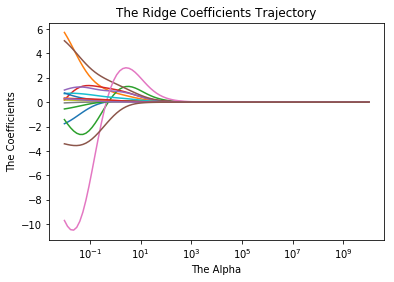

In [49]:
fig2= plt.gca()
fig2.plot(alphas,coefs2)
fig2.set_xscale('log')
plt.xlabel('The Alpha')
plt.ylabel('The Coefficients')
plt.title('The Ridge Coefficients Trajectory')

In [51]:
#Cross Validation for Ridge model
ridge_cv=RidgeCV(alphas = alphas, scoring='neg_mean_squared_error', normalize=True)
ridge_cv.fit(x,y)
print("The optimal value of the regularization penality is", ridge_cv.alpha_)

The optimal value of the regularization penality is 0.01


# 2

Short Answer. Explain in your own words the bias-variance tradeoff. What role does regularization play in this tradeoff? Make reference to your findings in number (1) to describe models of high/low bias and variance.|

(1)We expect the model has low variance and low bias, which means a high accuracy. However, it could not be achieved in real case. Reducing the variance usually brings a bias increase, it is the same as the change of bias. Keep these two parameters at a relatively low level is our target.

(2)Overfitting means that the model's bias is low with a high variance. Regularization is a way to avoid overfitting, which could decrease the predictors number. In this case, bias will increase with a lower variance, and thereby getting a reasonable MSE.

(3)The greater the value of alpha in #1's models is, the more cofficients of predictors become closer to zero, which brings a higher bias and a lower variance. When the value of alpha in #1's models is smaller, then more cofficients of predictors become larger, which brings a higher variance and a lower bias. 